### <center> **Experiment 4   Heat Transfer from a Pin Fin**

### Objective: 

1. To study the conduction of heat transfer from a pin fin.

### Aim: 
1. To study the temperature distribution along the length of a pin fin under free and forced convection heat transfer.
2. Draw a graph between flow rate and heat transfer coefficient & efficiency for different voltage settings.

### Theory:

It is obvious that a fin surface stick out from primary heat transfer surface. The temperature difference with surrounding fluid will steadily diminish as one move out along the fin. The design of the fins therefore requires knowledge of the temperature distribution in the fin. The main object of this experimental set up is to study the temperature distribution in a simple pin fin.

Fin efficiency = $\epsilon$ = tanh (mL) /mL

The temperature profile within a pin fin is given by:
[T-Tf] / [Tb – Tf] = [cosh m (L-x) +H sinh m (L-x)]/ [cosh mL + H sinh mL]


### Experimental Procedure: 
**Natural Convection:**
1. Start heating the fin by switching on the heater element and adjust the voltage by Dimmerstat. (Increase slowly from 0 onwards)
2. Start recording temperatures at each five minute interval until observing three consecutive readings are same.
3. Record the final steady state readings of Temperature Sensor No.1 to 6.
4. Repeat the same experiment for different heat input by varying voltage by
Dimmerstat.

**Forced Convections:**
1. Start heating the fin by switching on the heater and adjust voltage by dimmerstat.
2. Start the blower and adjust the flow of air with the help of fly valve provided on
the outlet pipe.
3. Start recording temperatures at each five minute interval until observing three
consecutive readings are same.
4. Record the pressure difference across the orifice by the manometer.
5. Repeat the experiment for different air flow rate and different heat input.

### Formulae:

#### Free Convection:

1. Mean temperature of the fin, $T_{m}$
$$T_{m}=\frac{T_{1}+T_{2}+T_{3}+T_{4}+T_{5}}{5}$$

2. Temperature of the fluid, $T_{f}$
$$T_{f} = T_{6}$$

3. Grashof No
$$G_{r}=\frac{g * \beta * D^{3} * \Delta T}{v^{2}}$$
$$\beta=\frac{1}{T_{m f}+273.15} \quad T_{m f}=\frac{T_{m}+T_{f}}{2}$$

4. Nusselt number
$$N_{u}=0.53 *\left(G_{r} * P_{r}\right)^{1 / 4}$$

5. Fin parameter
$$m=\sqrt{\frac{h * C}{\boldsymbol{k}_{b} * A}}$$
$$C=\pi * D \quad A=\frac{\pi * D^{2}}{4}$$

6. Fin efficiency
$$\varepsilon=\frac{\tanh (m * L)}{m^{*} L}$$

7. Fin parameter
$$\boldsymbol{H}=\frac{h}{k_{b} * m}$$

8. Temperature profile:
$$\frac{T-T_{f}}{T_{b}-T_{f}}=\frac{[\operatorname{Cosh}(m(L-x))+H * \operatorname{Sinh}(m(L-x))]}{\left[\operatorname{Cosh}(m L)+H^{*} \operatorname{Sinh}(m L)\right]}$$

#### Forced Convection:

1. Mean temperature of the fin, $T_{m}$
$$T_{m}=\frac{T_{1}+T_{2}+T_{3}+T_{4}+T_{5}}{5}$$

2. Temperature of the fluid, $T_{f}$
$$T_{f} = T_{6}$$

3. Volumetric flow rate of air
$$Q=\frac{C_{d} * a_{o} * a_{p} * \sqrt{(2 * g * \Delta H)}}{\sqrt{\left(a_{p}^{2}-a_{0}^{2}\right)}} \quad, \quad \Delta H=\Delta h *\left(\frac{\rho_{w}}{\rho_{a}}-1\right)$$

4. Velocity of air at mean fluid temperature ($T_{mf}$)
$$V_{1}=V *\left[\frac{T_{m f}+273.15}{T_{f}+273.15}\right], \quad R_{e}=\frac{V_{1}^{*} \rho_{a}^{*} D}{\mu}$$

5. Nusselt number
$$N_{u}=0.615 * Re^{0.466}$$

7. Temperature profile:
$$\frac{T-T_{f}}{T_{b}-T_{f}}=\frac{[\operatorname{Cosh}(m(L-x))+H * \operatorname{Sinh}(m(L-x))]}{\left[\operatorname{Cosh}(m L)+H^{*} \operatorname{Sinh}(m L)\right]}$$

### Observations and Calculations:

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [105]:
#Experimental data for free convection
T_1 = np.array([45.1,43.4,41.5,40.8,39.6,25.6])
V = 51
I = 0.4
Tm = np.mean(T_1)
Tf = T_1[5]
Tmf = (Tf + Tm)/2
beta = 1/(Tmf+273.15)
Pr = 0.706
D = 12.71e-3
nu = 16.25e-6
g = 9.81
L = 150e-3
kair=0.03003
kb = 111
delT = Tmf - Tf
Gr = g*beta*(D**3)*delT/(nu**2)
Nu = .53*(Pr*Gr)**0.25
h = Nu*kair/D
Tm+273.15
A = np.pi*(D**2)/4
C = np.pi*D
m = np.sqrt(h*C/(kb*A))
Eta_free = np.tanh(m*L)/(m*L)
H_free = h/(kb*m)
print("The Nusselt number is {:.4f}".format(Nu))
print("The heat transfer coefficent is {:.4f} W/m2 C".format(h))
print("The fin efficiency is {:.4f} %".format(Eta_free*100))
print("The fin parameter is {:.4f}".format(H_free))

The Nusselt number is 3.1259
The heat transfer coefficent is 7.3855 W/m2 C
The fin efficiency is 86.7810 %
The fin parameter is 0.0145


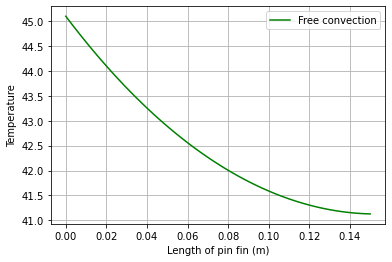

In [106]:
#Graph
Tb = T_1[0]
x = np.linspace(0,L,100)
deno = Tb - Tf
rhs = (np.cosh(m*(L-x)) + H_free*(np.sinh(m*(L-x))))/(np.cosh(m*L) + H_free*np.sinh(m*L))
T_free = (deno*rhs)+Tf
plt.plot(x,T_free,label="Free convection",color='g')
plt.xlabel("Length of pin fin (m)")
plt.ylabel("Temperature")
plt.legend()
plt.grid()

In [113]:
#Forced convection
rho_air = 1.16
rho_w = 997.1
mu = 0.00002
g = 9.81
kair = 0.02896
kb = 95
T_1 = np.array([36.5,34.5,32.1,31.1,29.7])
T_2 = np.array([35.3,33.3,30.8,29.8,28.4])
Tf_1 = 23.3
Tf_2 = 23.1
Tm_1 = np.mean(T_1)
Tm_2 = np.mean(T_2)
Tmf_1 = (Tm_1 + Tf_1)/2
Tmf_2 = (Tm_2 + Tf_2)/2
d0 = 0.026
dp = 0.052
a0 = (np.pi*d0**2)/4
ap = (np.pi*dp**2)/4
cd = 0.64
d_fin = 12.7e-3
L_fin = 150e-3
delh1 = 4.4
delh2 = 9.5
delH1 = delh1*((rho_w/rho_air) - 1)
delH2 = delh2*((rho_w/rho_air) - 1)
Q1 = cd*a0*ap*np.sqrt(2*g*delH1)/np.sqrt(ap**2 - a0**2)
Q2 = cd*a0*ap*np.sqrt(2*g*delH2)/np.sqrt(ap**2 - a0**2)
V1 = Q1/ap
V2 = Q2/ap
#Reynolds number of air
V1_1 = V1*((Tmf_1 + 273.15)/(T_6_1 + 273.15))
V1_2 = V2*((Tmf_2 + 273.15)/(T_6_2 + 273.15))
Re1 = V1_1*rho_air*d_fin/mu
Re2 = V1_2*rho_air*d_fin/mu
Nu1 = 0.615*(Re1**0.466)
Nu2 = 0.615*(Re2**0.466)
h1 = Nu1*kair/d_fin
h2 = Nu2*kair/d_fin
C = np.pi*d_fin
A = np.pi*(d_fin**2)/4
m1 = np.sqrt((h1*C)/(kb*A))
m2 = np.sqrt((h2*C)/(kb*A))
H1 = h1/(kb*m1)
H2 = h2/(kb*m2)
eta1 = np.tanh(m1*L_fin)/(m1*L_fin)
eta2 = np.tanh(m2*L_fin)/(m2*L_fin)

### Calculations:

In [114]:
Nu = np.array([Nu1,Nu2])
h = np.array([h1,h2])
m = np.array([m1,m2])
H = np.array([H1,H2])
eta = np.array([eta1,eta2])*100
calc2 = pd.DataFrame({'Nu':Nu,
                     'h':h, 'm':m,'eta %':eta})
print(calc2)

          Nu           h          m      eta %
0  79.169696  180.531842  24.464888  27.214568
1  94.643235  215.816384  26.749061  24.906686


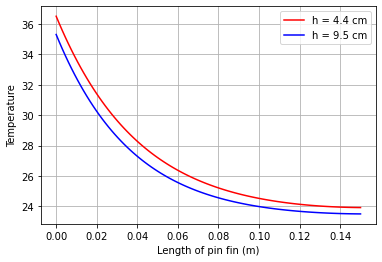

In [116]:
#Graph
Tb = T_1[0]
x = np.linspace(0,L_fin,100)

deno1 = Tb - Tf_1
rhs1 = (np.cosh(m1*(L_fin-x)) + H1*(np.sinh(m1*(L_fin-x))))/(np.cosh(m1*L_fin) + H1*np.sinh(m1*L_fin))
T_force1 = (deno1*rhs1)+Tf_1

deno2 = T_2[0] - Tf_2
rhs2 = (np.cosh(m2*(L_fin-x)) + H2*(np.sinh(m2*(L_fin-x))))/(np.cosh(m2*L_fin) + H2*np.sinh(m2*L_fin))
T_force2 = (deno2*rhs2)+Tf_2

plt.plot(x,T_force1,label="h = 4.4 cm",color='red')
plt.plot(x,T_force2,label='h = 9.5 cm',color='blue')
plt.xlabel("Length of pin fin (m)")
plt.ylabel("Temperature")
plt.legend()
plt.grid()

### Combined Graph:

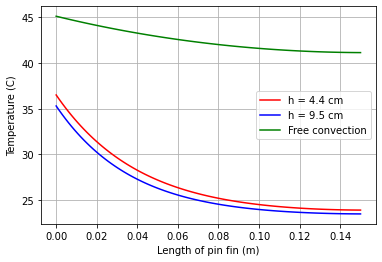

In [119]:
plt.plot(x,T_force1,label="h = 4.4 cm",color='red')
plt.plot(x,T_force2,label='h = 9.5 cm',color='blue')
plt.plot(x,T_free,label="Free convection",color='g')
plt.xlabel("Length of pin fin (m)")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid()
plt.show()

### Inference from Graph:

1. The graph for temperature variation across the length of fin is plotted for all the three sets of readings.
2. The forced convection at head = 9.5 cm shows the steepest slope indicating faster cooling compared to free convection.

### Conclusions:
1. The fin efficiency in the case of free convection is the highest and the fin parameter is also the lowest. This is because the fin is responsible for most of the heat transfer from the surface as the role of ambient air is minimal.
2. The fin efficiency decreases in the case of forced convection as convective heat transfer is primarily due to the air flowing with a given velocity compared to that from the fin.

### Industrial Applications:

Rectangular, stepped and elliptical pin-fins are commonly used in the space vehicles for effective cooling. They are also used in semiconductor processors, chips etc. where heat removal is essential.